In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn import preprocessing
import warnings 
warnings.filterwarnings("ignore")

In [7]:
data=pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


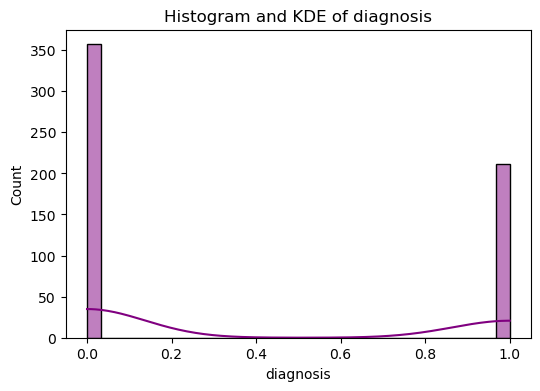

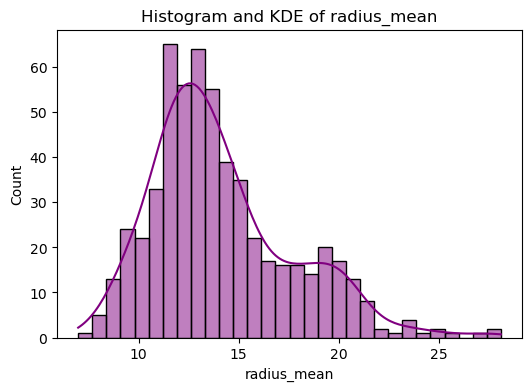

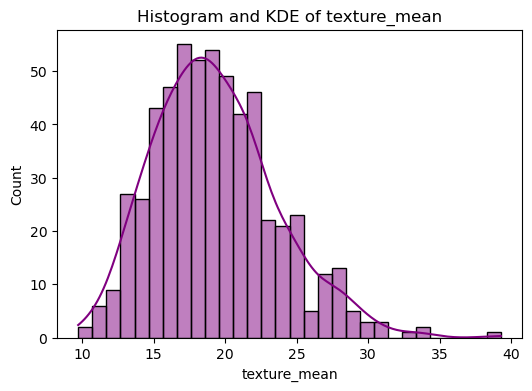

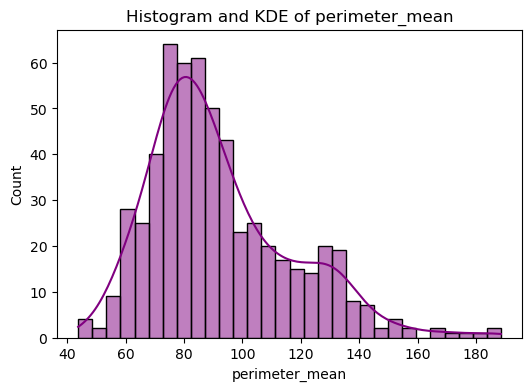

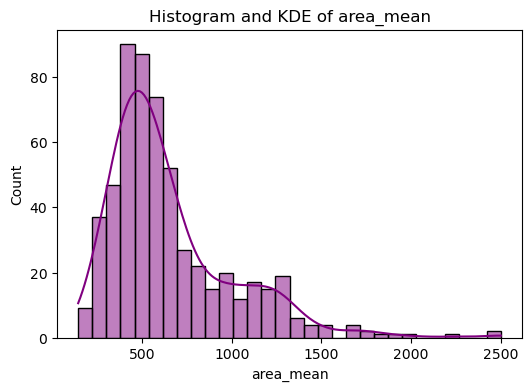

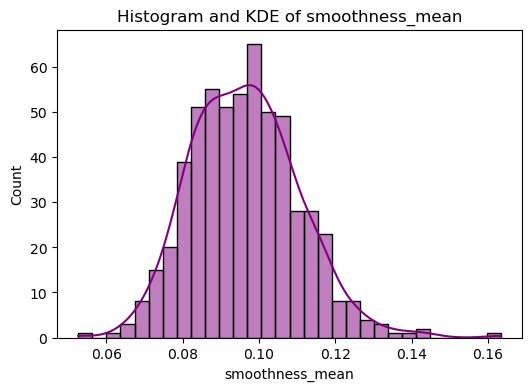

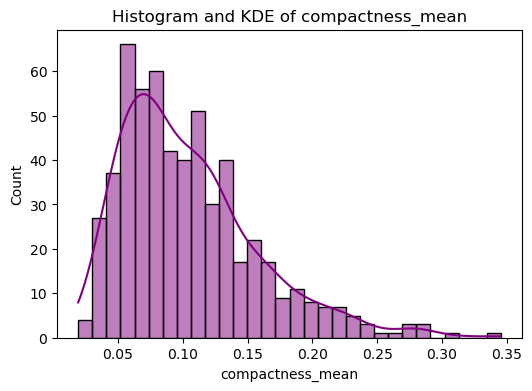

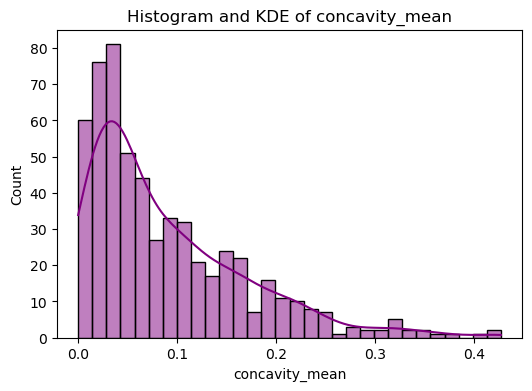

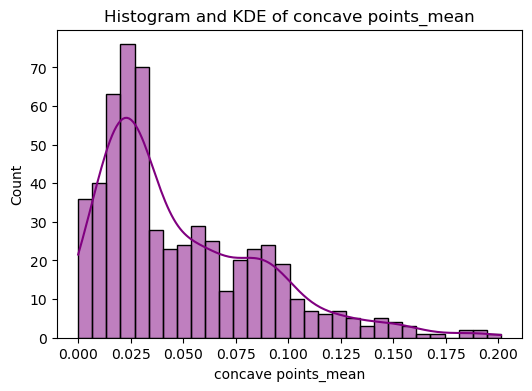

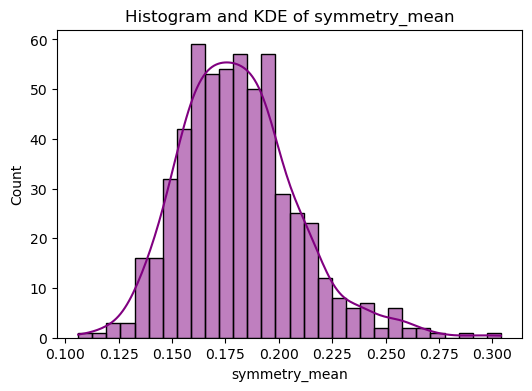

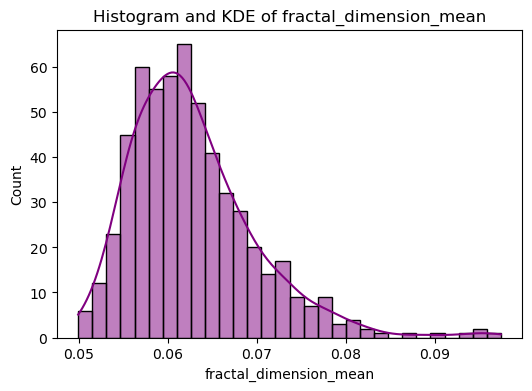

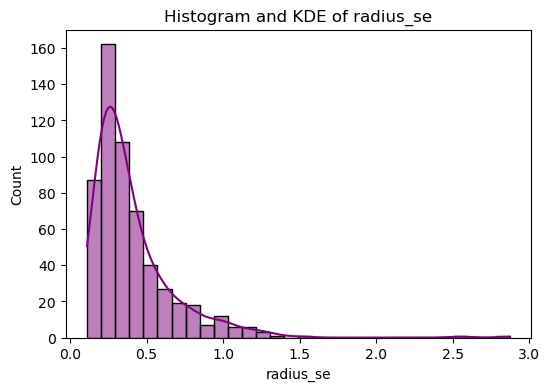

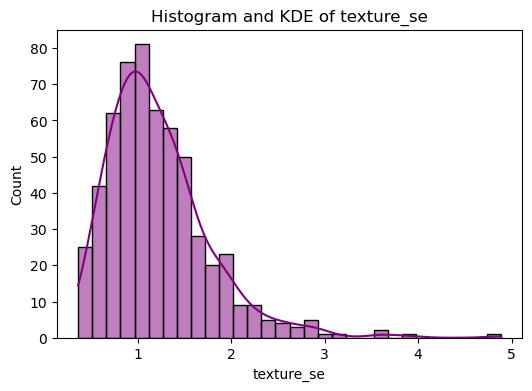

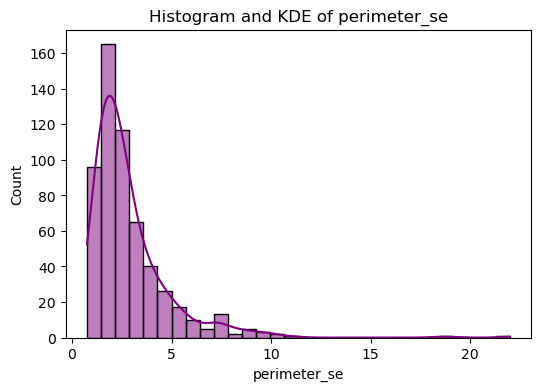

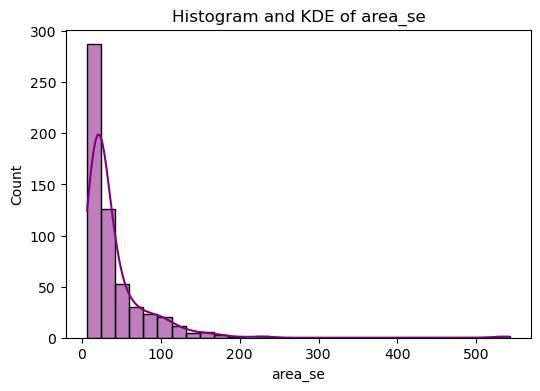

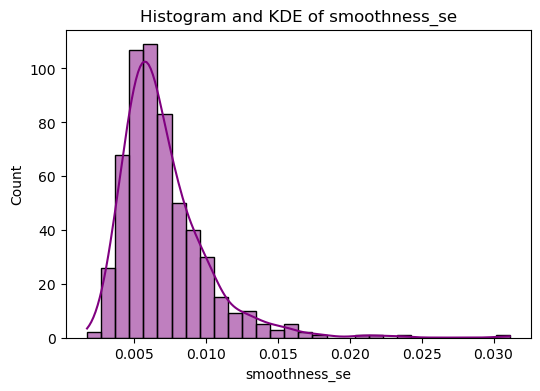

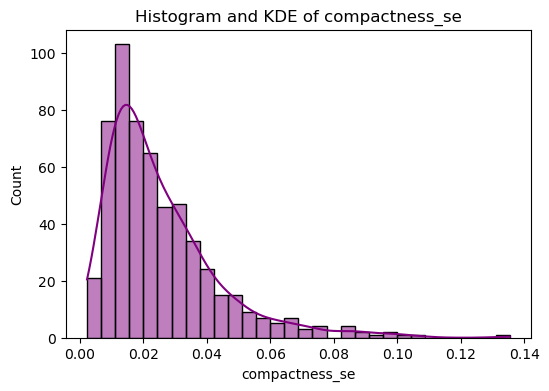

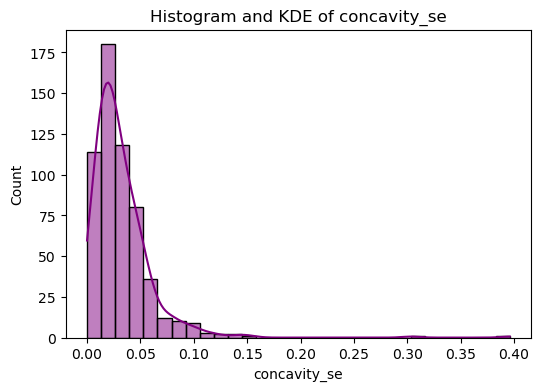

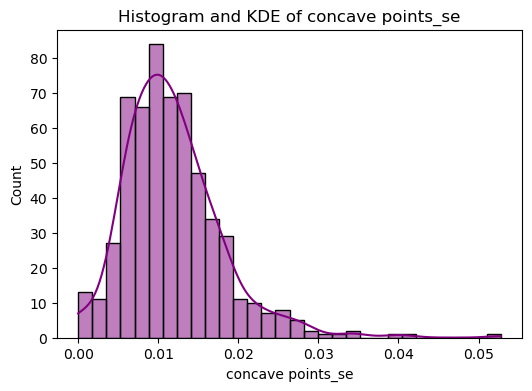

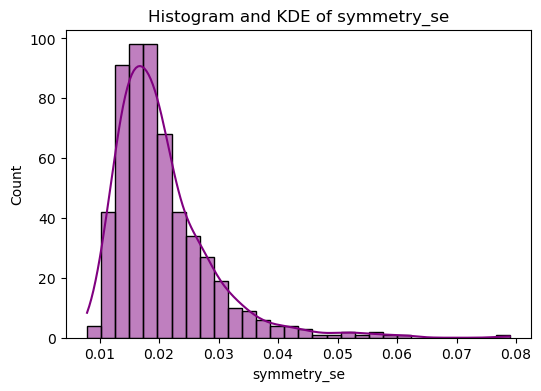

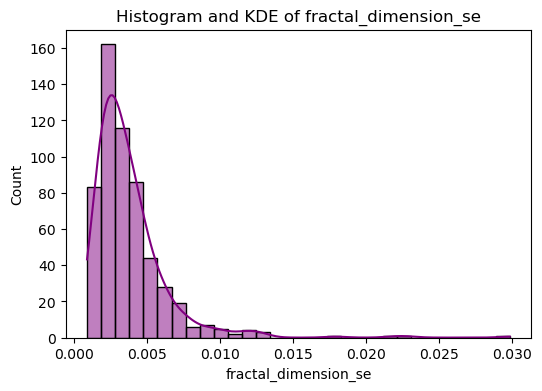

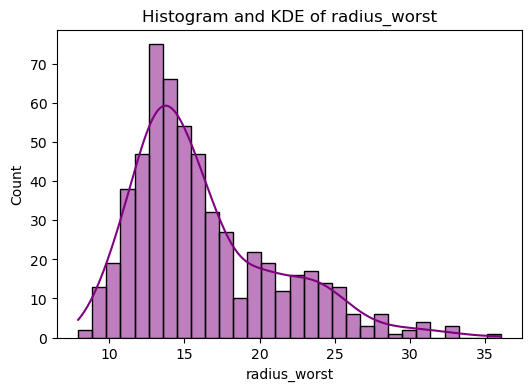

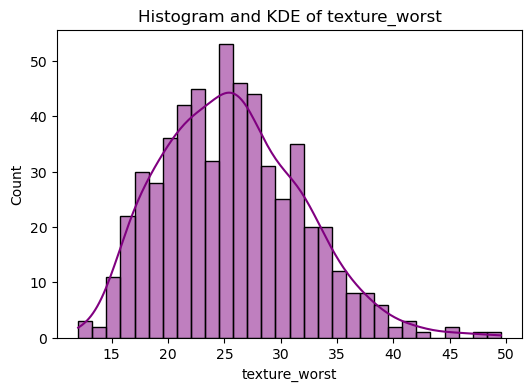

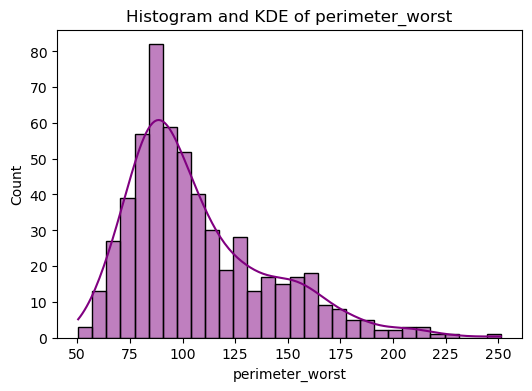

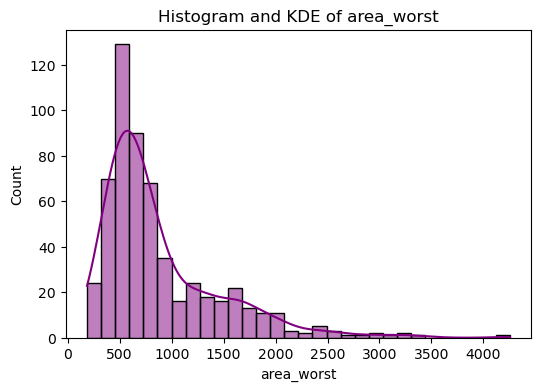

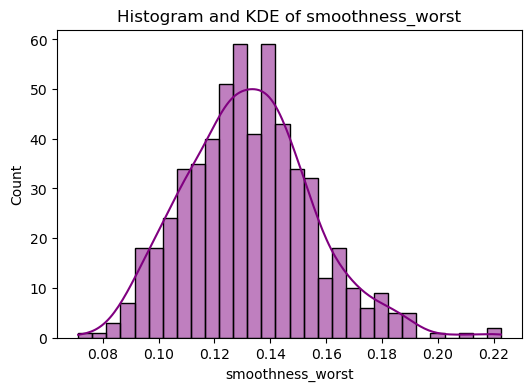

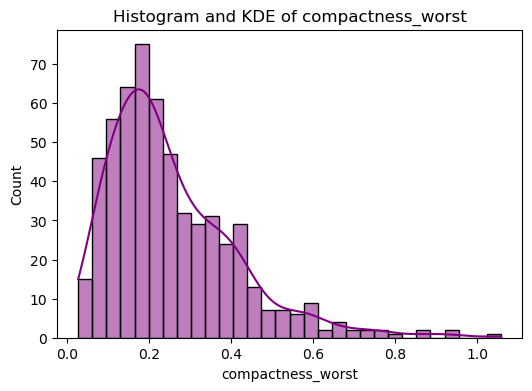

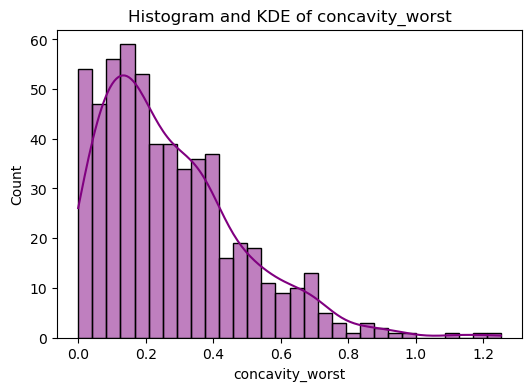

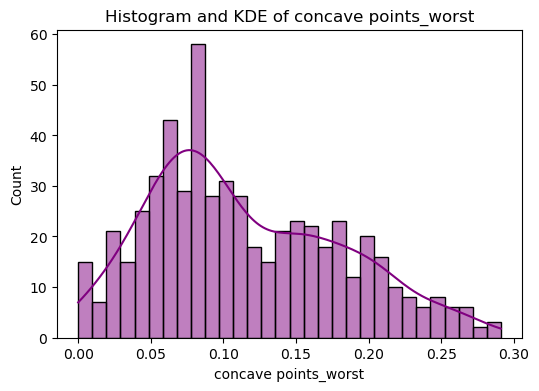

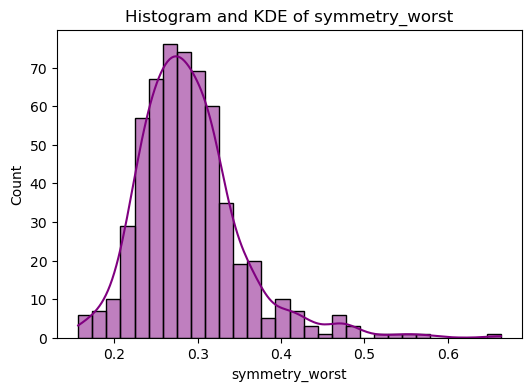

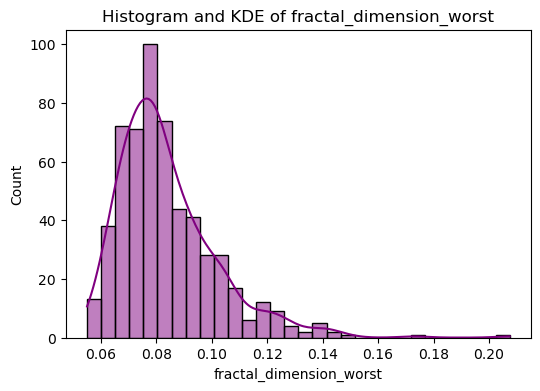

In [12]:
for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde=True,bins=30,color='purple')
    plt.xlabel(col)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

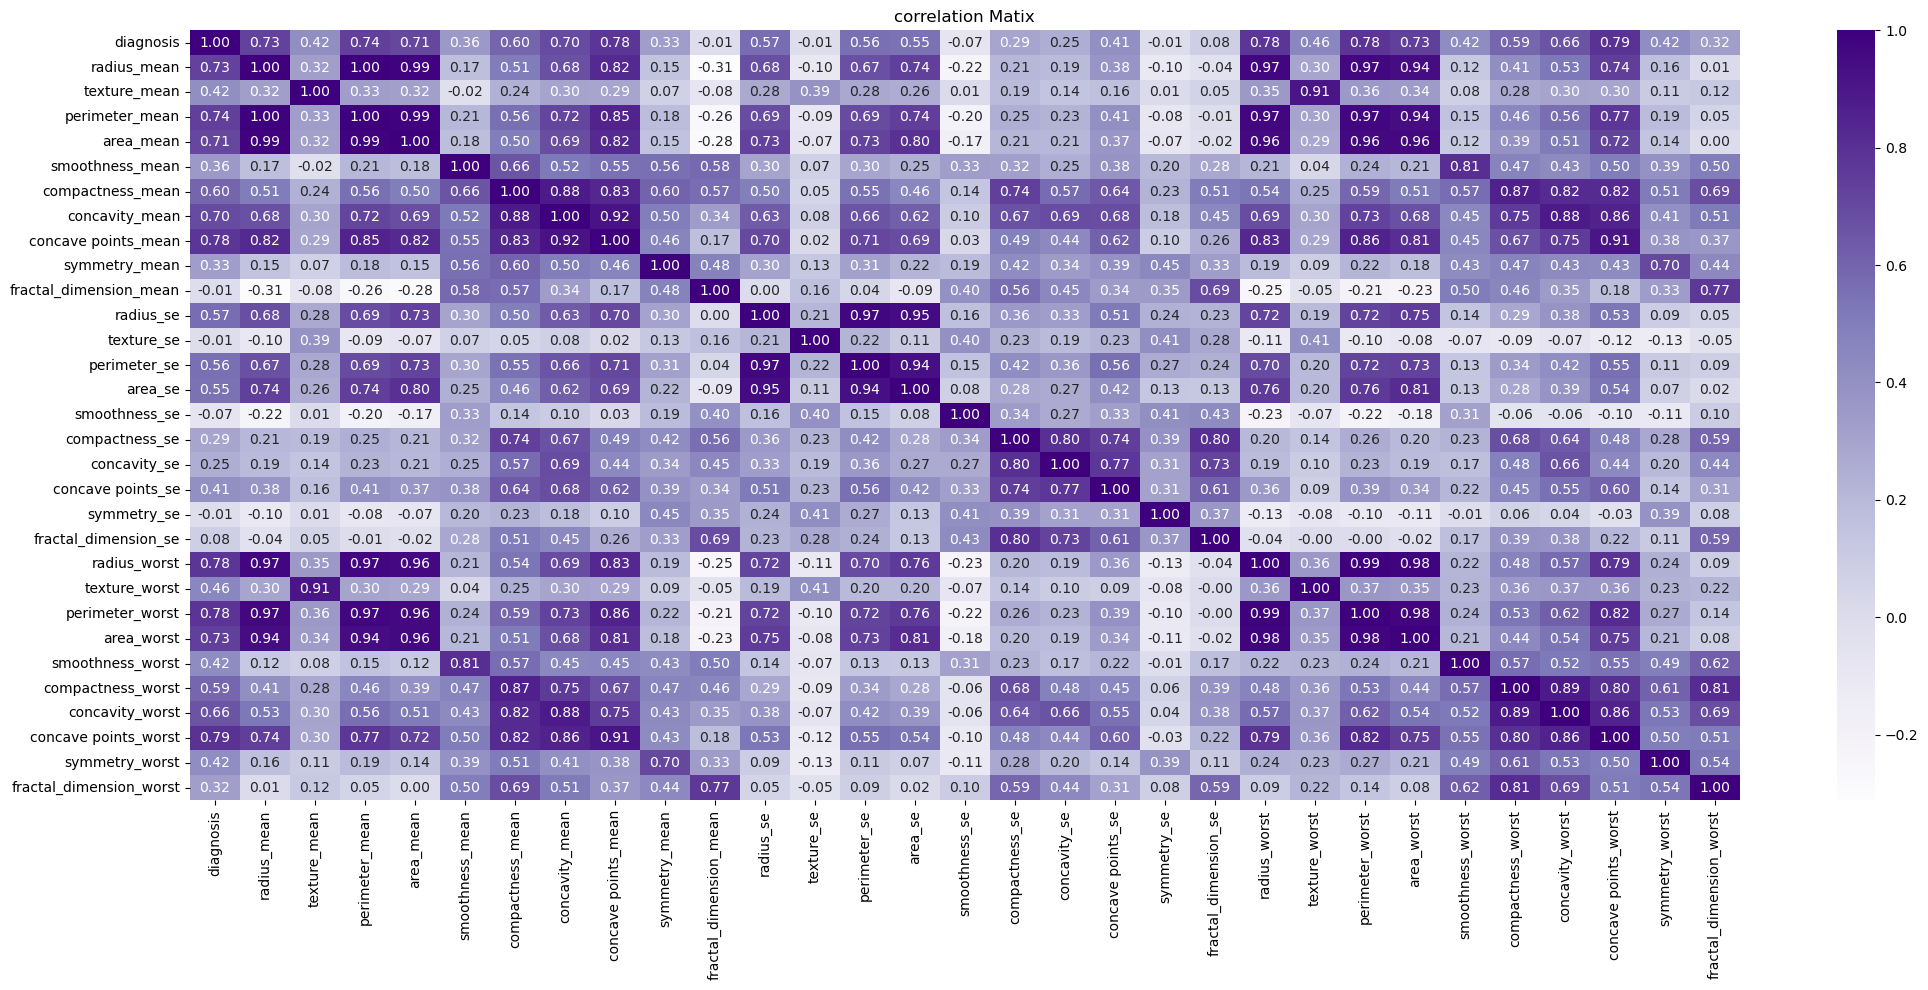

In [13]:
plt.figure(figsize=(25, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

In [14]:
threshold = 0.4
correlation_matrix = data.corr(numeric_only=True)
high_corr_features = correlation_matrix.index[abs(correlation_matrix["diagnosis"]) > threshold].tolist()
high_corr_features.remove("diagnosis")
print("Selected features based on correlation with diagnosis:")
print(high_corr_features)
X_selected = data[high_corr_features]
y = data["diagnosis"]

Selected features based on correlation with diagnosis:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

In [16]:
X_selected=data.drop(columns=['diagnosis'])
y=data['diagnosis']

In [17]:
X_train, X_test, Y_train, Y_test= train_test_split(X_selected,y, test_size=0.3, shuffle = True, random_state=42)

In [70]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [71]:
Y_pred_xgb = xgb_model.predict(X_test)
print(accuracy_score(Y_pred_xgb, Y_test))
print(confusion_matrix(Y_test, Y_pred_xgb))
print(classification_report(Y_test, Y_pred_xgb,digits=3))

0.9707602339181286
[[105   3]
 [  2  61]]
              precision    recall  f1-score   support

           0      0.981     0.972     0.977       108
           1      0.953     0.968     0.961        63

    accuracy                          0.971       171
   macro avg      0.967     0.970     0.969       171
weighted avg      0.971     0.971     0.971       171



In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 基础模型
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 参数网格
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],      # 学习率
    'max_depth': [3, 5, 7],                # 树深度
    'n_estimators': [100, 200],             # 树数量
    'subsample': [0.6, 0.8],               # 样本采样率
    'colsample_bytree': [0.6, 0.8],        # 特征采样率
    'gamma': [0, 0.1],                     # 节点分裂阈值
    'reg_lambda': [1, 1.5]                 # L2正则化
}

# 网格搜索
grid_search = GridSearchCV(estimator=xgb_model,
                         param_grid=param_grid,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1)

grid_search.fit(X_train, Y_train)

# 输出最佳参数
print(f"最佳参数: {grid_search.best_params_}")
print(f"最佳分数: {grid_search.best_score_:.4f}")

# 使用优化后的模型
optimized_xgb = grid_search.best_estimator_

最佳参数: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.6}
最佳分数: 0.9798


In [68]:
Y_pred_xgb_op = optimized_xgb.predict(X_test)
print(accuracy_score(Y_pred_xgb_op, Y_test))
print(confusion_matrix(Y_test, Y_pred_xgb_op))
print(classification_report(Y_test, Y_pred_xgb_op,digits=3))

0.9766081871345029
[[106   2]
 [  2  61]]
              precision    recall  f1-score   support

           0      0.981     0.981     0.981       108
           1      0.968     0.968     0.968        63

    accuracy                          0.977       171
   macro avg      0.975     0.975     0.975       171
weighted avg      0.977     0.977     0.977       171



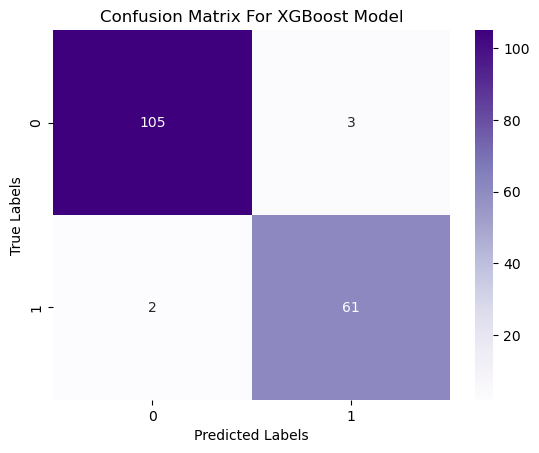

In [25]:
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For XGBoost Model')
plt.show()

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada_model_2 = AdaBoostClassifier(
    base_estimator=LogisticRegression(max_iter=1000, tol=1e-3),
    n_estimators=50
)
ada_model_2.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, tol=0.001))

In [34]:
ada_model_3 = AdaBoostClassifier(
    base_estimator=SVC(kernel='linear', probability=True),
    n_estimators=30,
    learning_rate=0.8
)
ada_model_3.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   learning_rate=0.8, n_estimators=30)

In [39]:
ada_model_4 = AdaBoostClassifier(
    base_estimator=GaussianNB(),
    n_estimators=100,
    learning_rate=0.5
)
ada_model_4.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.5,
                   n_estimators=100)

In [42]:
ada_model_5 = AdaBoostClassifier(
    base_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    n_estimators=100,
    learning_rate=0.5
)
ada_model_5.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric='logloss',
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...),
                   learning_rate=0.5, n_estimators=100)

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 基础决策树配置（深度建议1-3）
base_tree = DecisionTreeClassifier(
    max_depth=2,          # 控制树复杂度
    min_samples_split=10, # 防止过拟合
    criterion='gini'      # 分裂标准
)

# AdaBoost 决策树基线
ada_tree_model = AdaBoostClassifier(
    base_estimator=base_tree,
    n_estimators=50,      # 集成树数量
    learning_rate=0.8,    # 学习率
    algorithm='SAMME.R'   # 改进算法
)
ada_tree_model.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_split=10),
                   learning_rate=0.8)

In [72]:
Y_pred_ada_tree = ada_tree_model.predict(X_test)
print(accuracy_score(Y_pred_ada_tree, Y_test))
print(confusion_matrix(Y_test, Y_pred_ada_tree))
print(classification_report(Y_test, Y_pred_ada_tree,digits=3))

0.9532163742690059
[[105   3]
 [  5  58]]
              precision    recall  f1-score   support

           0      0.955     0.972     0.963       108
           1      0.951     0.921     0.935        63

    accuracy                          0.953       171
   macro avg      0.953     0.946     0.949       171
weighted avg      0.953     0.953     0.953       171



In [73]:
Y_pred_ada_2 = ada_model_2.predict(X_test)
print(accuracy_score(Y_pred_ada_2, Y_test))
print(confusion_matrix(Y_test, Y_pred_ada_2))
print(classification_report(Y_test, Y_pred_ada_2,digits=3))

0.9766081871345029
[[106   2]
 [  2  61]]
              precision    recall  f1-score   support

           0      0.981     0.981     0.981       108
           1      0.968     0.968     0.968        63

    accuracy                          0.977       171
   macro avg      0.975     0.975     0.975       171
weighted avg      0.977     0.977     0.977       171



In [74]:
Y_pred_ada_3 = ada_model_3.predict(X_test)
print(accuracy_score(Y_pred_ada_3, Y_test))
print(confusion_matrix(Y_test, Y_pred_ada_3))
print(classification_report(Y_test, Y_pred_ada_3,digits=3))

0.8421052631578947
[[108   0]
 [ 27  36]]
              precision    recall  f1-score   support

           0      0.800     1.000     0.889       108
           1      1.000     0.571     0.727        63

    accuracy                          0.842       171
   macro avg      0.900     0.786     0.808       171
weighted avg      0.874     0.842     0.829       171



宏平均精确率: {precision_score(Y_test, Y_pred_xgb_op, average='macro'):.4f}")
print(f"加权召回率: {recall_score(Y_test, Y_pred_xgb_op, average='weighted'):.4f}")

In [75]:
Y_pred_ada_4 = ada_model_4.predict(X_test)
print(accuracy_score(Y_pred_ada_4, Y_test))
print(confusion_matrix(Y_test, Y_pred_ada_4))
print(classification_report(Y_test, Y_pred_ada_4,digits=3))

0.9415204678362573
[[102   6]
 [  4  59]]
              precision    recall  f1-score   support

           0      0.962     0.944     0.953       108
           1      0.908     0.937     0.922        63

    accuracy                          0.942       171
   macro avg      0.935     0.940     0.938       171
weighted avg      0.942     0.942     0.942       171



In [76]:
Y_pred_ada_5 = ada_model_5.predict(X_test)
print(accuracy_score(Y_pred_ada_5, Y_test))
print(confusion_matrix(Y_test, Y_pred_ada_5))
print(classification_report(Y_test, Y_pred_ada_5,digits=3))

0.631578947368421
[[108   0]
 [ 63   0]]
              precision    recall  f1-score   support

           0      0.632     1.000     0.774       108
           1      0.000     0.000     0.000        63

    accuracy                          0.632       171
   macro avg      0.316     0.500     0.387       171
weighted avg      0.399     0.632     0.489       171



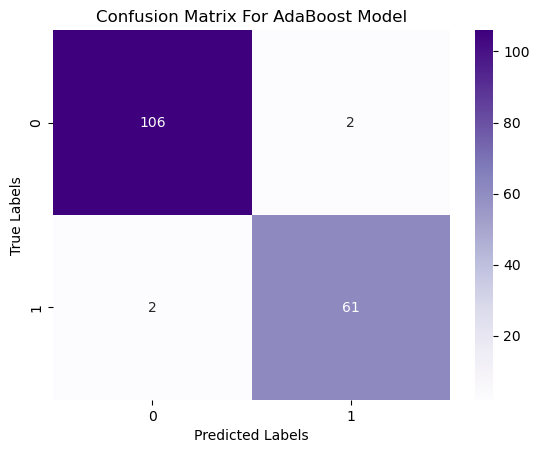

In [26]:
cm_ada = confusion_matrix(Y_test, Y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For AdaBoost Model')
plt.show()